[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]
{'Rabi1': 0.1, 'Rabi2': 1, 'penalty': 10.0}
Step  0:  	(weight2 = 0.005125669686986654 = 0.004876178930257292 + 0.00014904714576249246 + 0.00010044361096686933)
  [[ 0.00032467+0.j          0.00108925+0.77561231j  0.00108925+0.77561231j
     0.01356022+0.j        ]                                               
   [ 0.00108925-0.77561231j -0.00032467+0.j          0.01356022+0.j        
    -0.00108925+0.77561231j]                                               
   [ 0.00108925-0.77561231j  0.01356022+0.j         -0.00032467+0.j        
    -0.00108925+0.77561231j]                                               
   [ 0.01356022+0.j         -0.00108925-0.77561231j -0.00108925-0.77561231j
     0.00032467+0.j        ]]                                              
          [[0.+0.j         0.+0.24688507j 0.+0.24688507j 0.+0.j        ] 
   = pi *  [0.-0.24688507j 0.+0.j         0.+0.j         0.+0.24688507j] 
      

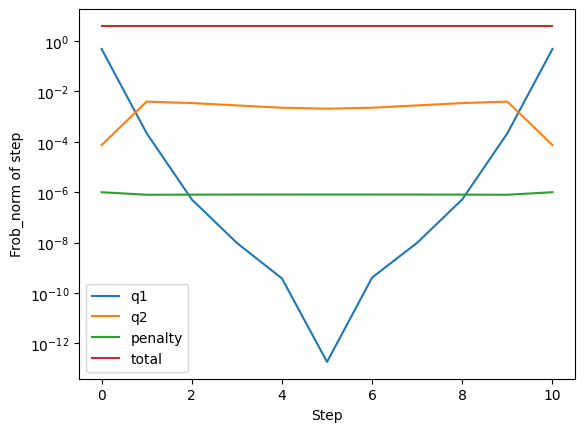

{'Utarget unitarity': 0.0, 'Vs unitarity': array([0.00000000e+00, 1.40998324e-14, 3.99680289e-15, 3.55271368e-15,
       3.10862447e-15, 2.99760217e-15, 1.70922214e-15, 5.99520433e-15,
       4.99600361e-15, 3.05551043e-15, 4.11702578e-15, 1.12798659e-13]), 'U_decomp err': array([9.25454672e-15, 8.91154193e-15, 3.25232337e-15, 2.43451876e-15,
       1.85579313e-15, 2.88390047e-15, 4.53137440e-15, 3.43522939e-15,
       5.06067633e-15, 4.88679701e-15, 4.89726645e-14,           -inf]), 'err': 1.127986593019159e-13}
{'Utarget unitarity': 0.0, 'Vs unitarity': array([0.00000000e+00, 2.78141191e-16, 4.44089210e-16, 4.44089210e-16,
       3.33066907e-16, 4.44089210e-16, 6.66133815e-16, 6.66133815e-16,
       3.21263941e-16, 4.44089210e-16, 4.44089210e-16, 4.44089210e-16]), 'U_decomp err': array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf]), 'err': 6.661338147750939e-16}


{'Utarget unitarity': 0.0,
 'Vs unitarity': array([0.00000000e+00, 2.78141191e-16, 4.44089210e-16, 4.44089210e-16,
        3.33066907e-16, 4.44089210e-16, 6.66133815e-16, 6.66133815e-16,
        3.21263941e-16, 4.44089210e-16, 4.44089210e-16, 4.44089210e-16]),
 'U_decomp err': array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf]),
 'err': 6.661338147750939e-16,
 'ConjMxCom Herm': 0.0,
 'MxComp compat': 0.0,
 'U2t_0w_proj': 0.0}

In [34]:
from pylab import *
from UnitaryChain import *
from solutionary import *
from numpy import *

dictionary = new_solutionary()
dictionary.load("tyler_sols2.obj")

UC = two_qubits_unitary(np.diag([1.,1.,1.,-1.])) # initialization necessary to avoid bug
# UC = dictionary.access("11-CZ-6P10+3")
UC = dictionary.index(16)
print(UC.Utarget)
print(UC.coef)
print(UC.str(verbose=3))

x = range(UC.N)
y = []

for s in range(UC.N):
    subnorms2 = []
    jlogU = UC.jlogU(s)
    jlogUT = jlogU.conj()
    ##	MxComp_weights2 = [ pe, R1, R1, pe, R1, 2*R2, 2*R2, pe, R1, 2*R2, 2*R2, pe, pe, pe, pe, pe ]
    R1_comps = np.array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    R2_comps = np.array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0])
    pe_comps = np.ones(16) - R1_comps - R2_comps
    comps = [ R1_comps, R2_comps, pe_comps ]
    for c in range(3):
        MxComps = (2/np.pi) * np.array([ comps[c][i] * np.sum(UC.ConjMxComp_list[i] * jlogUT) for i in range(16) ]).real
        M = np.tensordot(MxComps, UC.MxComp_list, axes=[[0],[0]]) / 2
        subnorms2.append(Frob_norm(zero_real_if_close(M)))
    subnorms2.append(Frob_norm(UC.U(s)))
    y.append(subnorms2)

y = array(y).transpose()
labels = ["q1", "q2", "penalty", "total"]
for i in range(len(y)):
    plot(x, y[i], label=labels[i])
yscale("log")
legend()
xlabel("Step")
ylabel("Frob_norm of step")
show()
UC.check_consistency(tol=1e-12)
UC.unitarize_point("all")
UC.check_consistency()